## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities by Using the citipy Library

In [2]:

# Reading the Output File (CSV)
# output_data_file = "output_data/cities.csv "
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 637


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to Retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# print(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

#     print(city)   
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#     city_url = url + "&q=" + city
    
#         city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
    city_url = url + "appid=" + weather_api_key + "&q=" + city  

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# #         print(city_wind)

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | madimba
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | port-cartier
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | bandiagara
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | praia da vitoria
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | casper
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | solhan
Processing Record 20 of Set 1 | agutaya
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | meyungs
City not found. Skipping...
Processi

Processing Record 37 of Set 4 | vrangel
Processing Record 38 of Set 4 | brufut
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | bruckmuhl
Processing Record 41 of Set 4 | anajatuba
Processing Record 42 of Set 4 | mehamn
Processing Record 43 of Set 4 | zonguldak
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | lakes entrance
Processing Record 46 of Set 4 | nyurba
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | bowen
Processing Record 49 of Set 4 | nyagan
Processing Record 0 of Set 5 | hithadhoo
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | vadso
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | dinguiraye
Processing Record 5 of Set 5 | auch
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | mangrol
Processing Record 8 of Set 5 | fort nelson
Processing Record 9 of Set 5 | zarnesti
Processing Record 10 of Set 5 | beidao
Processing Record 11 of Se

Processing Record 32 of Set 8 | batagay
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | airai
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | yankton
Processing Record 37 of Set 8 | erdenet
Processing Record 38 of Set 8 | guipavas
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | sortland
Processing Record 41 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | tazmalt
Processing Record 44 of Set 8 | jining
Processing Record 45 of Set 8 | auki
Processing Record 46 of Set 8 | vozhega
Processing Record 47 of Set 8 | manavgat
Processing Record 48 of Set 8 | solsvik
City not found. Skipping...
Processing Record 49 of Set 8 | shalakusha
Processing Record 0 of Set 9 | naron
Processing Record 1 of Set 9 | havelock
Processing Record 2 of Set 9 | santiago
Processing Record 3 of Set 9 | mapiripan
Processing Record 4 of Set 9 | aksarka
Processing Record 5 

City not found. Skipping...
Processing Record 14 of Set 12 | atambua
Processing Record 15 of Set 12 | eyl
Processing Record 16 of Set 12 | sambava
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | seymchan
Processing Record 19 of Set 12 | wolcott
Processing Record 20 of Set 12 | ferrol
Processing Record 21 of Set 12 | kilindoni
Processing Record 22 of Set 12 | matadi
Processing Record 23 of Set 12 | santa isabel do rio negro
Processing Record 24 of Set 12 | aykhal
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | soyo
Processing Record 27 of Set 12 | tupancireta
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | atbasar
Processing Record 30 of Set 12 | onguday
Processing Record 31 of Set 12 | barreirinhas
Processing Record 32 of Set 12 | kawalu
Processing Record 33 of Set 12 | bud
Processing Record 34 of Set 12 | rapid valley
Processing Record 35 of Set 12 | stekolnyy
City not found. Skipping...
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

        

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_data_df = city_data_df.dropna(how="any")
# print(city_weather_df.count())

# Show Record Count
(city_data_df.count())

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,293.05,93,100,7.01,ZA,1670202307
1,kapaa,22.0752,-159.3190,301.03,75,20,2.68,US,1670202061
2,madimba,-10.4000,40.3333,297.69,84,12,2.20,TZ,1670202308
3,san patricio,28.0170,-97.5169,292.55,79,100,2.89,US,1670202097
4,port-cartier,50.0334,-66.8654,257.89,89,16,3.52,CA,1670202309


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,293.05,93,100,7.01,ZA,1670202307
1,kapaa,22.0752,-159.3190,301.03,75,20,2.68,US,1670202061
2,madimba,-10.4000,40.3333,297.69,84,12,2.20,TZ,1670202308
3,san patricio,28.0170,-97.5169,292.55,79,100,2.89,US,1670202097
4,port-cartier,50.0334,-66.8654,257.89,89,16,3.52,CA,1670202309


## Create Scatter Plots Requested

### Latitude Vs. Temperature

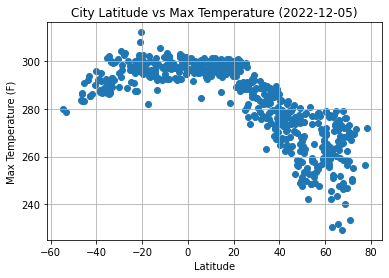

In [8]:
# Build scatter plot for latitude vs. temperature
#format the max date in the dataset as "runDate" for graph titles
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

# date_of_analysis = datetime.date(datetime.now())
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({runDate})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

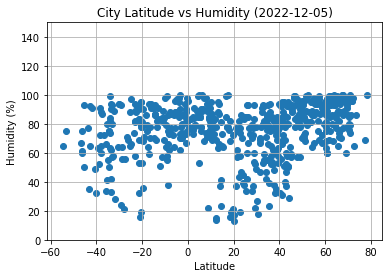

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values =city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

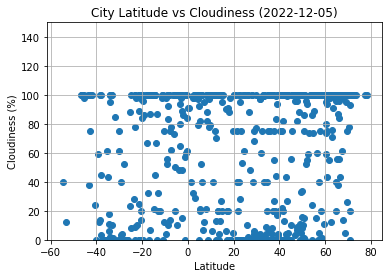

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values =city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({runDate})')
plt.ylim(0, 150)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude Vs. Wind Speed Plot

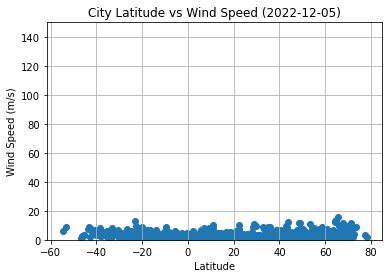

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values =city_data_df['Wind Speed']
# Incorporate the other graph properties

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({runDate})')
plt.ylim(0, 150)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
# # Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Plot scatter plot
# plt.scatter(x_values,y_values)

# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapaa,22.0752,-159.3190,301.03,75,20,2.68,US,1670202061
3,san patricio,28.0170,-97.5169,292.55,79,100,2.89,US,1670202097
4,port-cartier,50.0334,-66.8654,257.89,89,16,3.52,CA,1670202309
6,port hardy,50.6996,-127.4199,274.55,72,1,0.84,CA,1670202041
7,albany,42.6001,-73.9662,272.72,78,0,1.72,US,1670202005


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,293.05,93,100,7.01,ZA,1670202307
2,madimba,-10.4000,40.3333,297.69,84,12,2.20,TZ,1670202308
5,busselton,-33.6500,115.3333,291.51,62,100,4.69,AU,1670202054
10,rikitea,-23.1203,-134.9692,297.33,81,78,5.42,PF,1670202039
12,bambous virieux,-20.3428,57.7575,297.71,78,97,5.06,MU,1670202311


### Temperature Vs. Latitude Linear Regression Plot

The r-value is: -0.8310253020202382
y = -0.67x + 303.98


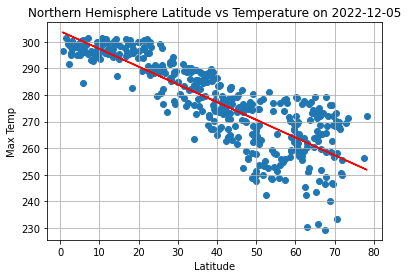

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# #tweak where the equation appears on the plot

# regEQplotX = 0
# regEQplotY = 40
# #label the y axis
# y_label = "Temperature (F)"
# #give the title
# plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
# #run the function with all 5 variables
# linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the neighboring output_data folder
# plt.savefig("output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png")
# # plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
# plt.show()
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temperature on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Tempersature on {runDate}.png")



The r-value is: 0.5796821223923513
y = 0.23x + 300.29


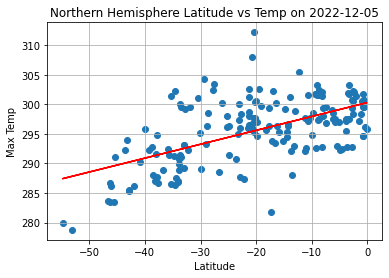

In [16]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png")

# plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()


### Discussion about the linear relationship: 

The above plots show  linear regression models between Maximum temperature and latitude for Northern and Southern Hemisphere cities. Results show a strong, negative correlation between Maximum tempreture and latitude for Northern Hemisphere cities. One possible implication is that the climate near the equator is hotter, so as we move north from the equator, the maximum Temperature (F) decreases. For the Southern Hemisphere cities, there is a weak positive relationship between Maximum Tempereture and latitude .

### Humidity Vs. Latitude Linear Regression Plot

The r-value is: 0.28834450501705017
y = 0.28x + 65.58


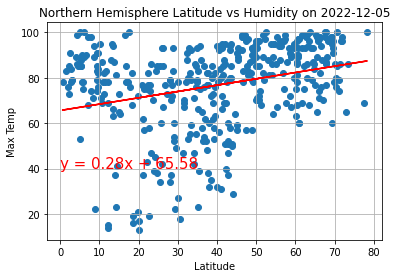

In [17]:
# Northern Hemisphere
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temp"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Nothern Hemisphere Latitude vs Humidity on {runDate}.png")

# createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
# plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
# plt.show()

The r-value is: 0.2898701286837339
y = 0.38x + 81.84


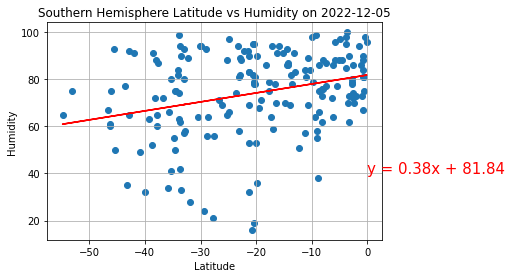

In [18]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png")

# createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
# plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
# plt.show()

### Discussion about the linear relationship:
The above plots show linear regression models between Humidity (%) and Latitude for Northern  and Southern Hemisphere cities. Results indicate a weak positive relation between Humidity (%) and Latitude for both the Northern and Southern Hemisphere cities. 

### Cloudiness Vs. Latitude Linear Regression Plot

The r-value is: 0.17253002236171286
y = 0.36x + 47.61


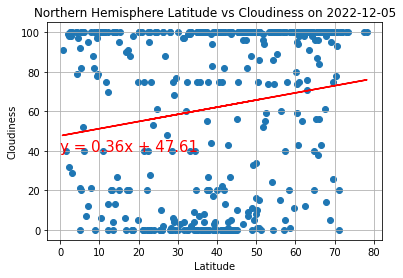

In [19]:
# Northern Hemisphere
# x_values = northern_hemisphere_weather_df['Lat']
# y_values = northern_hemisphere_weather_df['Cloudiness']
# createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

# plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
# plt.show()

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png")

The r-value is: 0.2668439249376649
y = 0.8x + 75.8


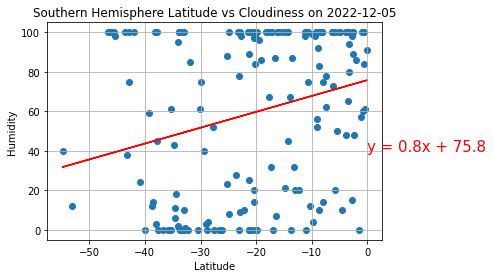

In [20]:
# Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
# x_values = southern_hemisphere_weather_df['Lat']
# y_values = southern_hemisphere_weather_df['Cloudiness']
# createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
# plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
# plt.show()
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png")

### Discussion about the linear relationship: 

The plots above depict linear regression models between Cloudiness (%) and Latitude for Northern and Southern Hemisphere cities. results from the data indicate very weak positive correlation between Cloudiness (%) and Latitude for the cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.22859372724004967
y = 0.03x + 2.32


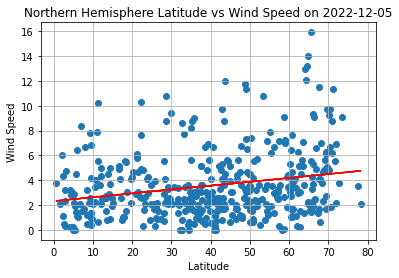

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png")

The r-value is: -0.40571445184034294
y = -0.07x + 1.93


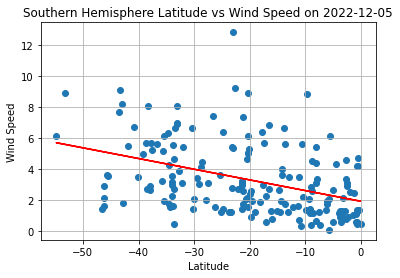

In [22]:
# Southern Hemisphere

# Create a scatter plot for latitude vs wind speed (southern hemisphere)
# x_values = southern_hemisphere_weather_df['Lat']
# y_values = southern_hemisphere_weather_df['Wind Speed']
# createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
# plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
# plt.show()E

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png")

### Discussion about the linear relationship: 

The above plots depict linear regression models between Wind Speed (mph), and latitude for Northern and SOsuthern Hemisphere cities. Results from the model indicate a weak to almsost non existent relationship for the Northern Hemisphere cities and a weak negative relation for the SOuthern Hemisphere cities